In [1]:
# import necessary packages
import os
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import geopandas as gpd
from descartes import PolygonPatch
from tqdm import tqdm
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

In [2]:
#THIS FILE IS NOT INCLUDED IN THE GITHUB REPOSITYORY! Because of its filesize of 850MB (too large for GitHub).
#BEFORE RUNNING THIS CODE, UNPACK THE FULL_DF.ZIP FILE! DO NOT COMMIT THE FILE TO THE REPO!
df = pd.read_csv("output/full_df.csv").drop(columns="Unnamed: 0")

In [3]:
X = df.groupby("Neighborhood number").mean()[['KPI-p-sc-lower', 'KPI-p-sc-working',
       'KPI-p-sc-middle', 'KPI-p-sc-upper']]

In [4]:
kmeans = KMeans(n_clusters=6)
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=6, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [5]:
X.loc[:,'labels'] = kmeans.labels_

In [6]:
buurten = gpd.read_file("output/buurten.shp")
buurten = buurten.merge(X.reset_index(),left_on="BUURTCODE",right_on="Neighborhood number")

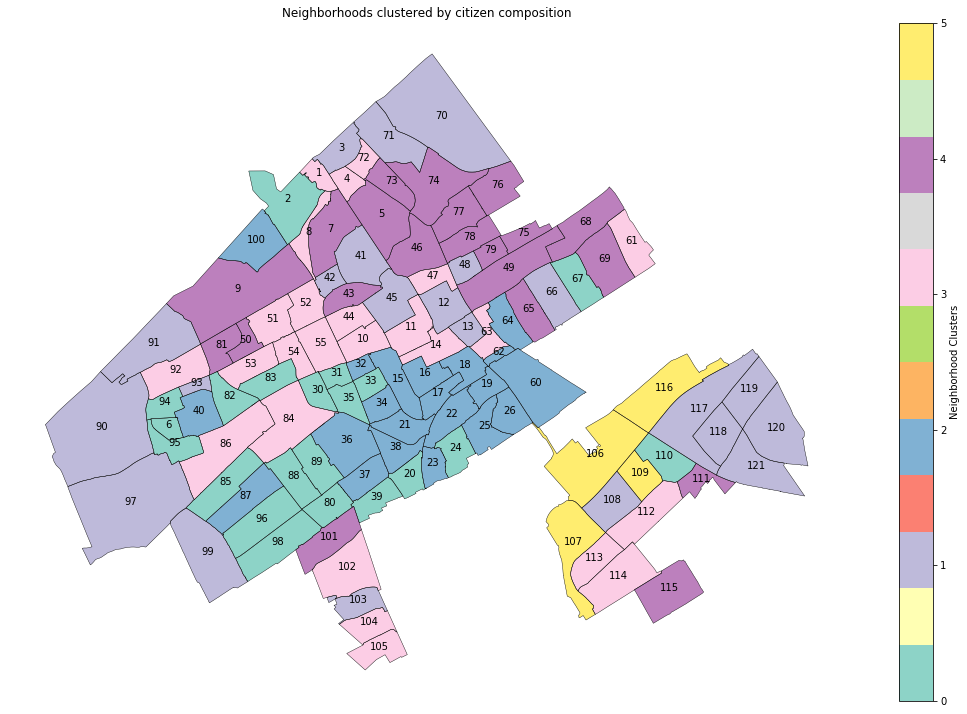

In [7]:
fig = plt.figure(1, figsize=(15,10)) 
ax = fig.add_subplot()
buurten.apply(lambda x: ax.annotate(s=x.BUURTCODE, xy=x.geometry.centroid.coords[0], ha='center', fontsize=10),axis=1);
buurten.boundary.plot(ax=ax, color='Black', linewidth=.4)
buurten.plot(ax=ax, cmap='Set3', column='labels', figsize=(12, 12),legend=True,
                 legend_kwds={'label': "Neighborhood Clusters"}).axis('off')
plt.title("Neighborhoods clustered by citizen composition")
fig.tight_layout()
plt.savefig("output/images/map_cluster_nhs.png")
plt.show()

In [8]:
df2 = df.merge(X.reset_index()[["Neighborhood number","labels"]])

In [9]:
melted_df = pd.melt(df2.reset_index()[['labels','KPI-p-sc-lower', 'KPI-p-sc-working',
       'KPI-p-sc-middle', 'KPI-p-sc-upper']], id_vars="labels", var_name="KPI", value_name="percentage")
melted_df.name = "Total"

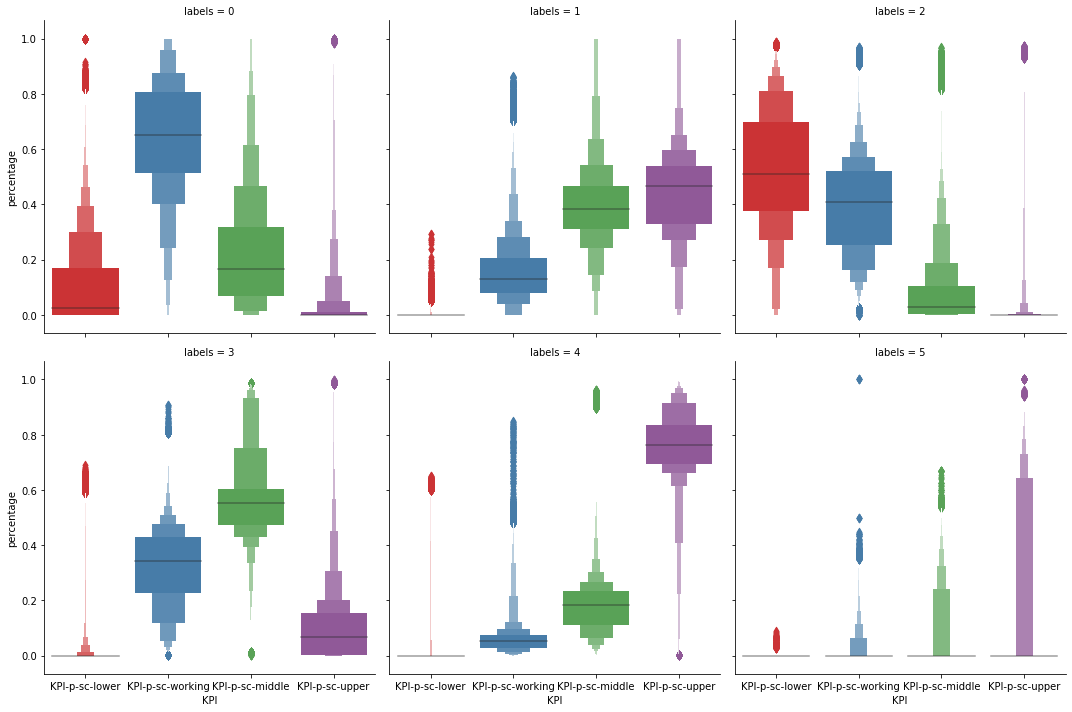

In [10]:
sns.catplot(x="KPI",y="percentage",col="labels",data=melted_df,kind="boxen",palette="Set1",col_wrap=3)
plt.savefig("output/images/boxplot_cluster_nhs.png")

In [13]:
melted_df_eth = pd.melt(df2.reset_index()[['labels','KPI-p-dutch',
       'KPI-p-other-western', 'KPI-p-antilles', 'KPI-p-morocco',
       'KPI-p-suriname', 'KPI-p-turkey', 'KPI-p-indonesian',
       'KPI-p-eastern-eu', 'KPI-p-other-nonwestern']], id_vars="labels", var_name="KPI", value_name="percentage")
melted_df_eth.name = "Total"

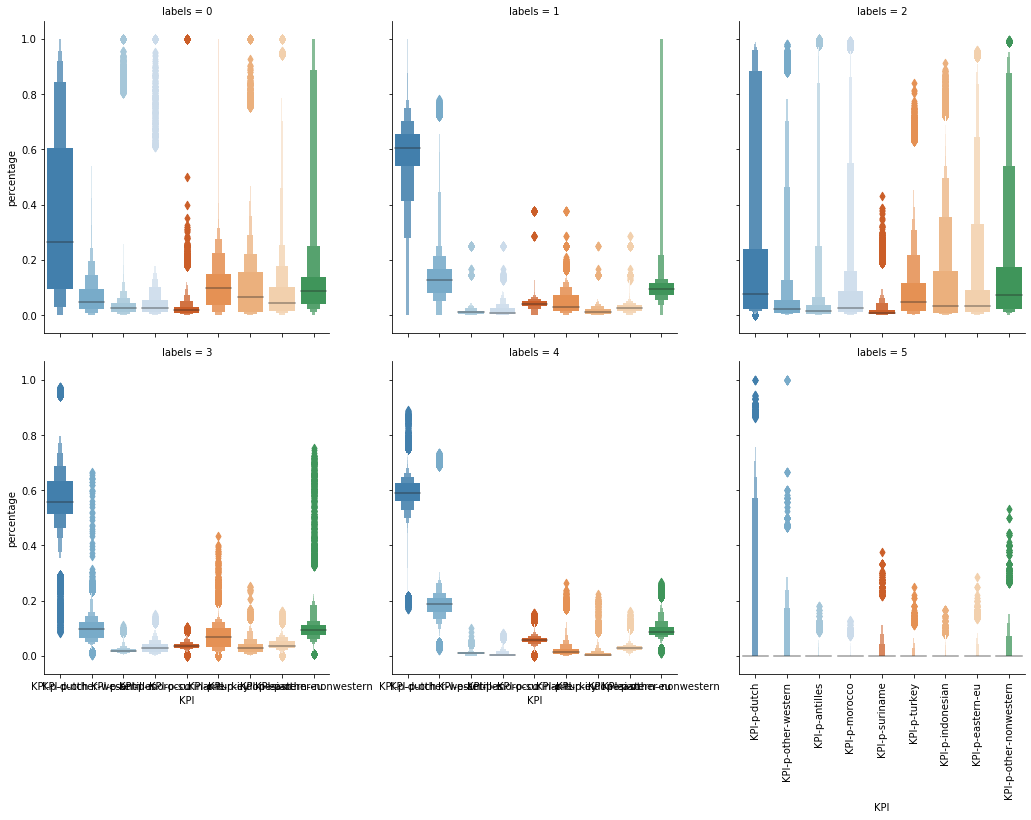

In [22]:
sns.catplot(x="KPI",y="percentage",col="labels",data=melted_df_eth,kind="boxen",palette="tab20c",col_wrap=3)
plt.xticks(rotation=90)
plt.savefig("output/images/boxplot_cluster_nhs_ethnicity.png")